In [3]:
'''
Growth rate
'''

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
import math

# figure save option
save_option = True
figsavepath = "../Figures/Figure2_time-PV.svg"

# read data for panel b
paths = ["../Data/Figure2/2023-07-24 data.xlsx", # without feedback
         "../Data/Figure2/2023-09-20 data.xlsx" # with feedback SV0.2 
        ]

df_list, X_list, Y_list = [], [], []
for path in paths:
    df = pd.read_excel(path)
    
    # cut the first ~10 mins when the growth rate is not calculated
    g_rates = df['Smth_G (mm/h)'].to_list()
    for g in g_rates:
        if g == 0:
            pass
        else:
            g_index = g_rates.index(g)
            break
    df = df[g_index:]
    
    df_list.append(df)
    X = df['Time (h)'].to_list()
    Y = df['Smth_G (mm/h)'].to_list()
    Y_ = df['Growth rate (mm/h)'].to_list()
    X_list.append(X)
    Y_list.append([Y,Y_])

# get the files
dir_path = '../Data/00_FRC-excels'
excel_paths = [
    f"{dir_path}/230128_A_0.1mmh-48hrs.xlsx",
    f"{dir_path}/230920_A_0.2mmh.xlsx",
    f"{dir_path}/230925_D_0.3mmh.xlsx",
    f"{dir_path}/230214_A_0.4No.2.xlsx",
    f"{dir_path}/230426_A_0.5mmh.xlsx"
]

labels = ["0.1 mm/h", "0.2 mm/h", "0.3 mm/h","0.4 mm/h","0.5 mm/h"]

dfe_list, Xe_list, Ye_list = [], [], []
for path in excel_paths:
    df = pd.read_excel(path)
    dfe_list.append(df)
    Xe = df['Time (h)'].to_list()
    Ye = df['Smth_G (mm/h)'].to_list()
    Ye_ = df['Growth rate (mm/h)'].to_list()
    Xe_list.append(Xe)
    Ye_list.append([Ye,Ye_])

print('Ready to plot')

Ready to plot


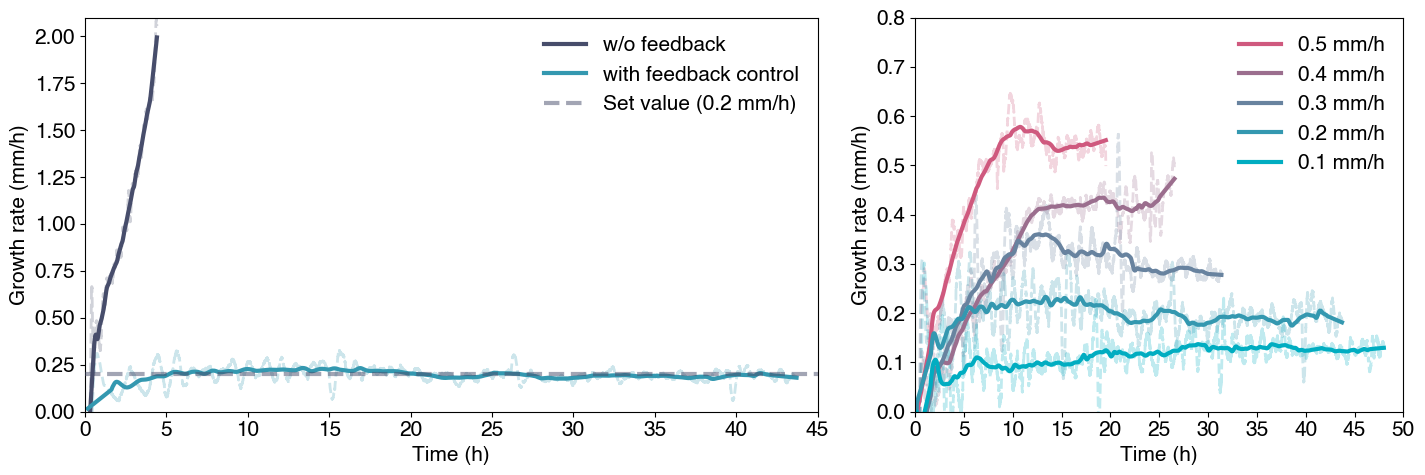

In [4]:
# Plot
plt.rcParams["font.size"] = 15
plt.rcParams['font.family'] = 'Helvetica'
fig = plt.figure(figsize=(14.5, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[6,4])
color1 = "#474D6B" # dark blue
color2 = '#3498B0' # light blue

# Plot for panel b: control vs no-control
ax1 = plt.subplot(gs[0])
ax1.plot(X_list[0],Y_list[0][0], color=color1, linewidth=3, label="w/o feedback",zorder=2)
ax1.plot(X_list[1],Y_list[1][0], color=color2, label='with feedback control', linewidth=3,zorder=2)
ax1.plot(X_list[0],Y_list[0][1], linestyle='dashed',color=f'{color1}40', linewidth=2,zorder=1)
ax1.plot(X_list[1],Y_list[1][1], linestyle='dashed',color=f'{color2}40', linewidth=2,zorder=1)
ax1.plot([0,45],[0.2,0.2],linestyle='dashed', color=f"{color1}80", linewidth=3, zorder=3,label='Set value (0.2 mm/h)')
ax1.set_xlim(0,45)
ax1.set_ylim(0,2.1)
ax1.set_xticks(np.arange(0,50,5))
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Growth rate (mm/h)')
ax1.legend(frameon=False)

# Plot for panel c
ax2 = plt.subplot(gs[1])
colors = ['#01ADC1', '#3498B0', '#68839F', '#9B6E8E', '#CF597E'] # from blue to red

# representative control data
for j in range(5):
    i = 4-j    
    ax2.plot(Xe_list[i],Ye_list[i][1], linestyle='dashed', color=f'{colors[i]}40', linewidth=2, zorder=1)
for j in range(5):
    i = 4-j
    ax2.plot(Xe_list[i],Ye_list[i][0], color=colors[i], label=labels[i], linewidth=3, zorder=2)
ax2.set_xlim(0,50)
ax2.set_ylim(0,0.8)
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Growth rate (mm/h)')
ax2.set_xticks(np.arange(0,55,5))
ax2.legend(frameon=False)

# Show and save the plot
plt.tight_layout()
if save_option:
    plt.savefig(figsavepath, dpi=1200, bbox_inches='tight', transparent=True)
plt.show()